In [191]:
import pandas as pd
import numpy as np
from agcounts.extract import get_counts
import agcounts
import matplotlib.pyplot as plt

In [192]:
ppID = "L_011"
root = "C:\\Users\\u0117545\\Documents\\GitHub\\ULIFT_BC\\ProtocolLum\\model\\"
file = "Export_for_countsR.xlsx"
fullpath = root + file
raw = pd.read_excel(fullpath, sheet_name=ppID, header=None)

In [193]:
raw.rename(columns={0: 'X', 1: 'Y', 2 : 'Z'}, inplace=True)
raw = np.array(raw)

In [194]:
freq=30
epoch=1
fast=True
verbose=True

counts = get_counts(raw, freq=30, epoch=epoch, fast=True, verbose=False)
del raw
counts = pd.DataFrame(counts, columns=["Axis1", "Axis2", "Axis3"])
counts["AC"] = (
        counts["Axis1"] ** 2 + counts["Axis2"] ** 2 + counts["Axis3"] ** 2
    ) ** 0.5

In [195]:
usage = counts.loc[counts['AC'] > 1]
seconds_active_counts = len(usage) / 60
print(round(seconds_active_counts,2))

19.57


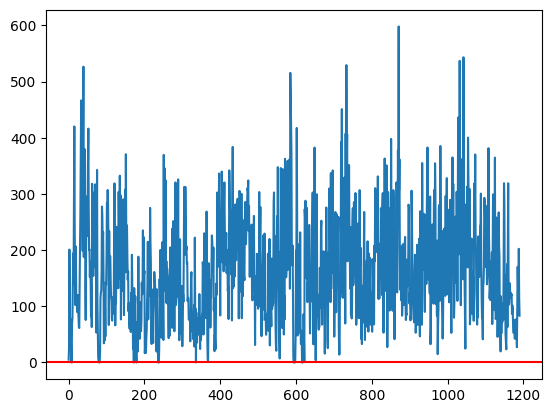

In [196]:
plt.plot(counts['AC'])
plt.axhline(y = 1, color = 'r', linestyle = '-')